In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis, skew


In [2]:
df = pd.read_csv(r'E:\UK Assignments\Applied  Data Science 1\used_car_dataset.csv')

In [3]:
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [5]:
df.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(9535, 11)

In [8]:
df.describe()

,Year,Age
count,9535.000000,9535.000000
mean,2016.375669,7.624331
std,4.071090,4.071090
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


In [9]:
# Cleaning and preprocessing the data

df['kmDriven'] = df['kmDriven'].astype(str).str.replace(' km', '').str.replace(',', '').astype(float)
df['AskPrice'] = df['AskPrice'].str.replace('â‚¹ ', '').str.replace('₹ ', '').str.replace(',', '').astype(float)



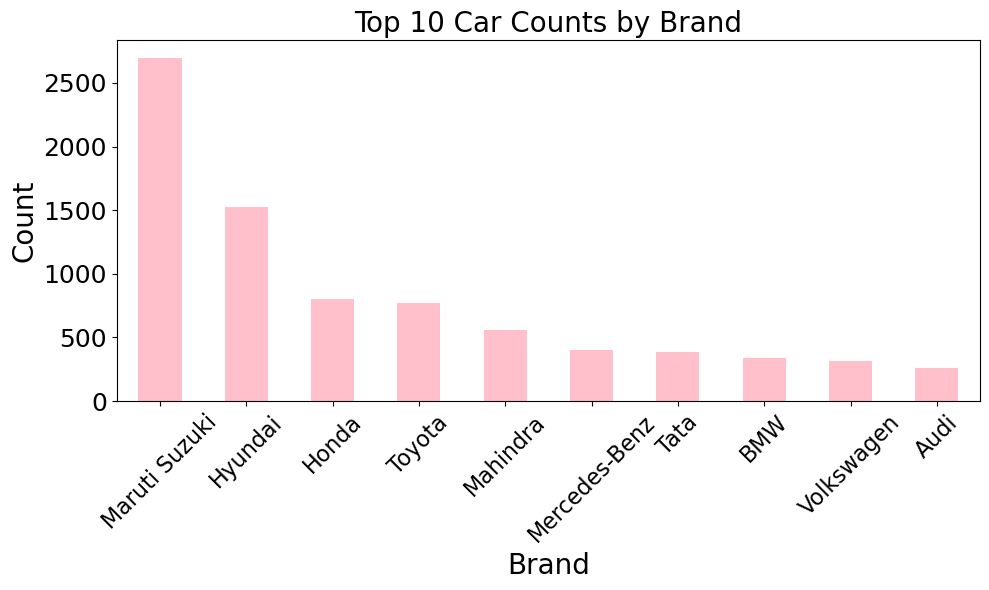

In [10]:
# 1. Bar Graph : Brand vs Count

def plot_top_brands(df):
    
    # Getting the top 10 brands by car count
    top_10_brands = df["Brand"].value_counts().head(10)

    # Plotting the bar chart for the top 10 brands
    plt.figure(figsize=(10, 6))
    top_10_brands.plot(kind="bar", color="pink", fontsize=18)
    plt.title("Top 10 Car Counts by Brand", fontsize=20)
    plt.xlabel("Brand", fontsize=20)
    plt.ylabel("Count", fontsize=20)
    plt.xticks(rotation=45, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_top_brands(df)


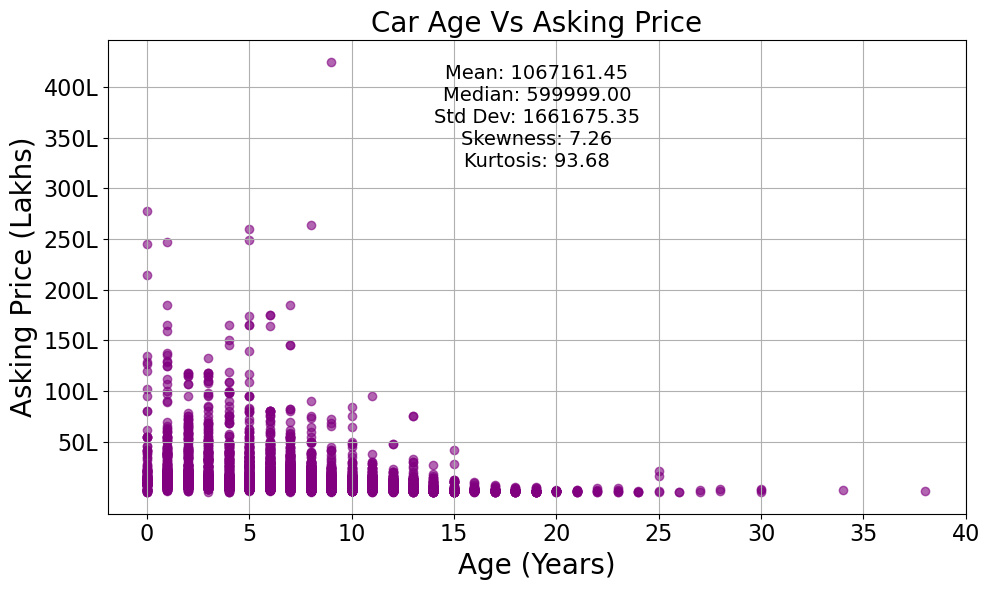

In [11]:
# 2. Scatter plot: Age vs AskPrice


def plot_age_vs_askprice(df):

    # Statistical Analysis for AskPrice
    mean_ask_price = df['AskPrice'].mean()
    median_ask_price = df['AskPrice'].median()
    std_ask_price = df['AskPrice'].std()
    skew_ask_price = skew(df['AskPrice'])
    kurt_ask_price = kurtosis(df['AskPrice'])
    
    # Printting the statistics
    stats_text = (
        f"Mean: {mean_ask_price:.2f}\n"
        f"Median: {median_ask_price:.2f}\n"
        f"Std Dev: {std_ask_price:.2f}\n"
        f"Skewness: {skew_ask_price:.2f}\n"
        f"Kurtosis: {kurt_ask_price:.2f}"
    )
    
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Age"], df["AskPrice"], color="purple", alpha=0.6)
    plt.title("Car Age Vs Asking Price", fontsize=20)
    plt.xlabel("Age (Years)", fontsize=20)
    plt.ylabel("Asking Price (Lakhs)", fontsize=20)
    plt.yticks(
        ticks=[5000000 * i for i in range(1, 9)],
        labels=[f"{i*50}L" for i in range(1, 9)],
        fontsize=16
    )
    plt.xticks(range(0, 41, 5), fontsize=16)
    plt.grid(True)
    
    # Displaying all statistical text in the plot
    plt.text(0.5, 0.95, stats_text, ha='center', va='top', transform=plt.gca().transAxes, fontsize=14, color='black')
    
    plt.tight_layout()
    plt.show()

plot_age_vs_askprice(df)


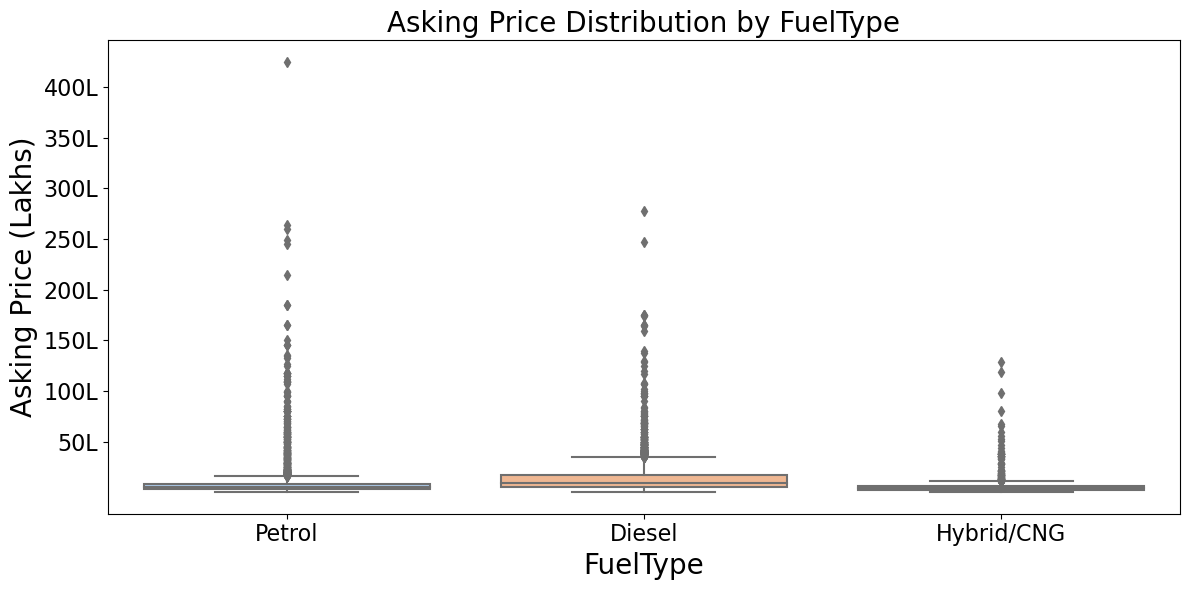

In [12]:
# 3. Box plot: Distribution of Asking Price by FuelType

def plot_box_fueltype(df):

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="FuelType", y="AskPrice", data=df, palette="pastel")
    plt.title("Asking Price Distribution by FuelType", fontsize=20)
    plt.xlabel("FuelType", fontsize=20)  # Changed to 'FuelType' as it's the correct label
    plt.ylabel("Asking Price (Lakhs)", fontsize=20)  # Changed 'INR' to 'Lakhs' for consistency
    
    # Setting the y-ticks for the box plot, similar to your scatter plot
    plt.yticks(
        ticks=[5000000 * i for i in range(1, 9)],  # 50 Lakhs (50,00,000) to 400 Lakhs (40,000,000) in 50 Lakhs steps
        labels=[f"{i*50}L" for i in range(1, 9)],  # Labels: 50L, 100L, 150L, 200L, 250L, 300L, 350L, 400L
        fontsize=16
    )
    plt.xticks(fontsize=16)
    plt.tight_layout()
    plt.show()

plot_box_fueltype(df)


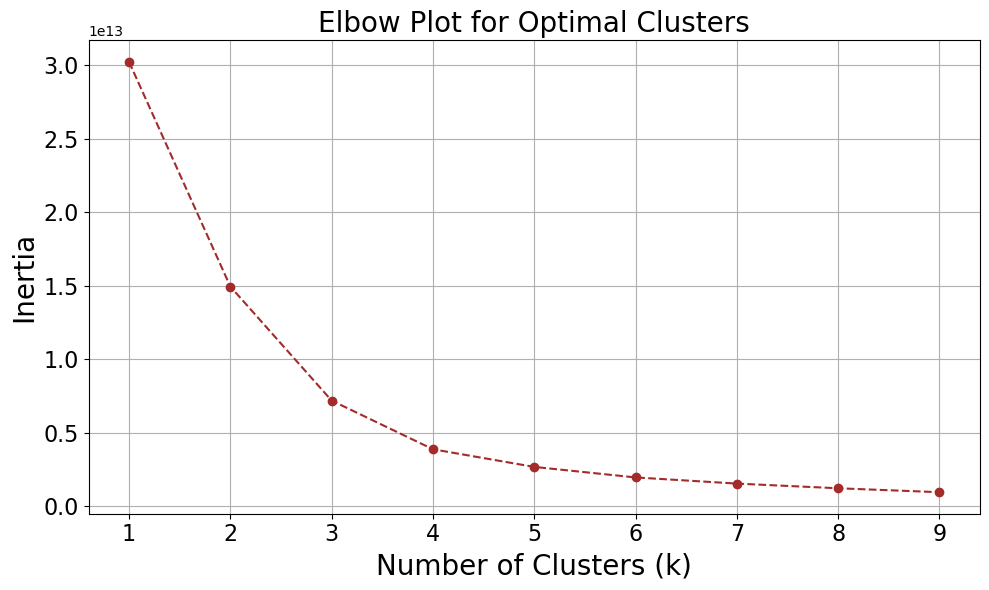

In [13]:
# 4. Clustering 

def plot_elbow_plot(df):

    # Extracting features for clustering
    X = df[["kmDriven", "Age"]]

    # Defining the range for the number of clusters
    k_range = range(1, 10)
    inertia = []

    # Iterate through the range and calculating inertia for each k
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plotting the Elbow Plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker="o", linestyle="--", color="brown")
    plt.title("Elbow Plot for Optimal Clusters", fontsize=20)
    plt.xlabel("Number of Clusters (k)", fontsize=20)
    plt.ylabel("Inertia", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_elbow_plot(df)


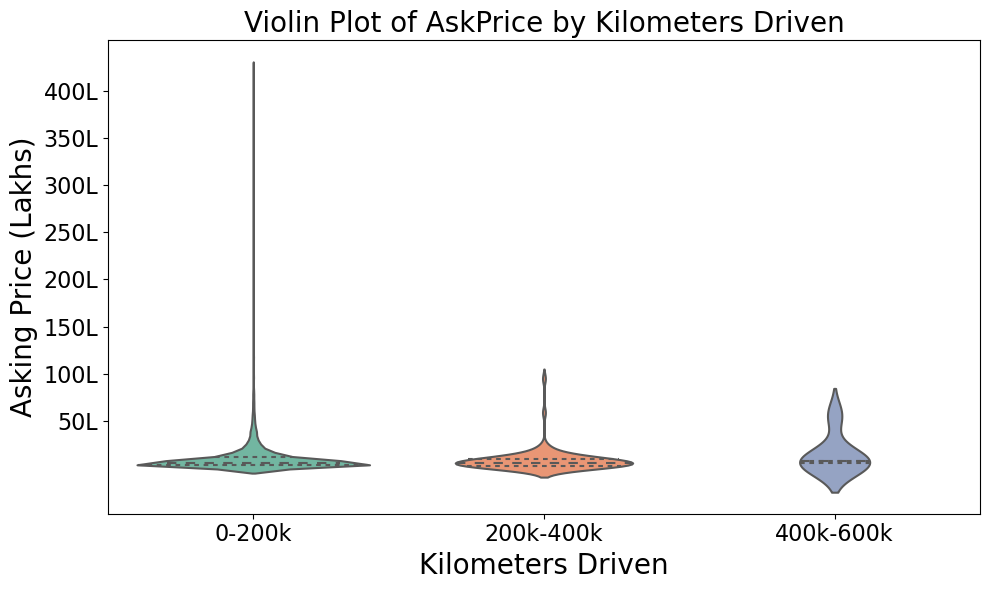

In [14]:
# 5. Creating a violin plot of Askprice by Kilometers Driven

def plot_violin_by_km_category(df):
    
    # Preprocessing the kmDriven column to remove 'km' and commas, and convert to numeric
    df['kmDriven'] = df['kmDriven'].replace({' km': '', ',': ''}, regex=True).astype(float)

    # Categorize kmDriven into specific ranges
    bins = [0, 200000, 400000, 600000]
    labels = ['0-200k', '200k-400k', '400k-600k']
    df['kmCategory'] = pd.cut(df['kmDriven'], bins=bins, labels=labels, right=False)

    # Creating a violin plot to visualize the distribution of AskPrice by kmCategory
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='kmCategory', y='AskPrice', data=df, inner="quart", palette="Set2")

    # Increase the font size of the title, x and y labels
    plt.title('Violin Plot of AskPrice by Kilometers Driven', fontsize=20)
    plt.xlabel('Kilometers Driven', fontsize=20)  # X-axis label for kilometers categories
    plt.ylabel('Asking Price (Lakhs)', fontsize=20)  # Y-axis label for price

    # Set custom y-ticks from 50 Lakhs to 400 Lakhs (5000000 to 40000000) with 50 Lakhs intervals
    plt.yticks(
        ticks=[5000000 * i for i in range(1, 9)],   # 50 Lakhs (5,000,000) to 400 Lakhs (40,000,000) in 50 Lakhs steps
        labels=[f"{i*50}L" for i in range(1, 9)],   # Labels: 50L, 100L, 150L,200L,250L,300L,350L,400L
        fontsize=16
    )

    plt.xticks(fontsize=16)
    plt.tight_layout()
    plt.show()

plot_violin_by_km_category(df)


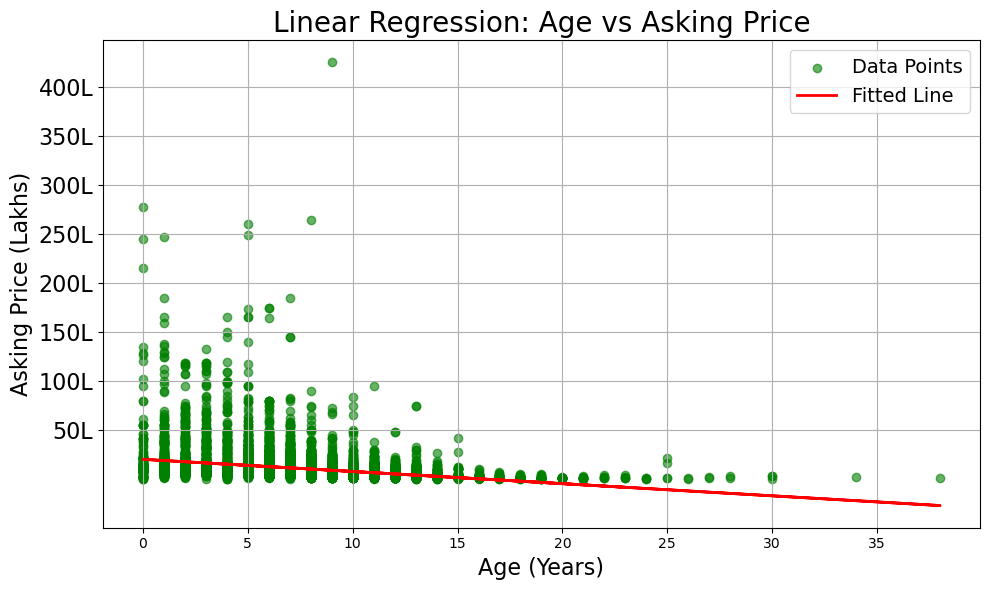

In [15]:
# 6. Line fitting (also known as linear regression or curve fitting)


def plot_line_fitting(df):

    
    # Line fitting to the columns 'Age' and 'AskPrice'
    X = df[['Age']]
    y = df['AskPrice']  # Target (AskPrice)
    
    # Creating the linear regression model
    model = LinearRegression()
    
    # Fitting the model
    model.fit(X, y)
    
    # Predicting by using the fitted model
    y_pred = model.predict(X)
    
    # Plotting the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Age'], df['AskPrice'], color='green', alpha=0.6, label="Data Points")
    
    # Plotting the fitted line
    plt.plot(df['Age'], y_pred, color='red', linewidth=2, label="Fitted Line")
    
    # Setting custom y-ticks from 50 Lakhs to 400 Lakhs (5000000 to 40000000) in 50 Lakhs steps
    plt.yticks(
        ticks=[5000000 * i for i in range(1, 9)],  # 50 Lakhs (50,00,000) to 400 Lakhs (40,000,000) in 50 Lakhs steps
        labels=[f"{i * 50}L" for i in range(1, 9)],  # Labels: 50L, 100L, 150L, 200L, 250L, 300L, 350L, 400L
        fontsize=16
    )
    
    # Labels and title
    plt.title('Linear Regression: Age vs Asking Price', fontsize=20)
    plt.xlabel('Age (Years)', fontsize=16)
    plt.ylabel('Asking Price (Lakhs)', fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_line_fitting(df)


In [16]:
#  Finding the kurtosis and skewness

from scipy.stats import kurtosis, skew
    
def calculate_kurtosis_skewness(df):
    # Calculating the skewness and kurtosis for the 'AskPrice' column
    skewness_value = skew(df['AskPrice'])
    kurtosis_value = kurtosis(df['AskPrice'])
    
    print(f"Skewness of Asking Price: {skewness_value}")
    print(f"Kurtosis of Asking Price: {kurtosis_value}")
    
    return skewness_value, kurtosis_value

skewness, kurtosis = calculate_kurtosis_skewness(df)

Skewness of Asking Price: 7.26473195406062
Kurtosis of Asking Price: 93.68187523584565
